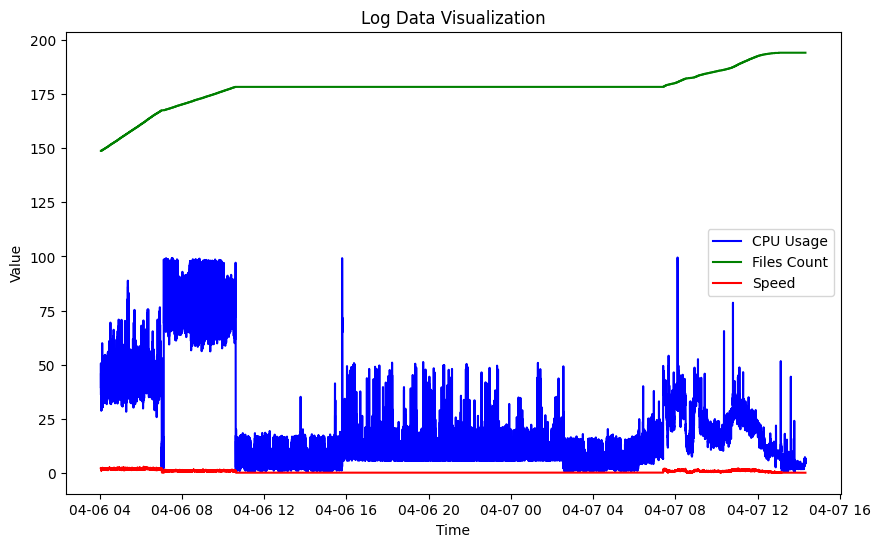

In [1]:
import matplotlib.pyplot as plt
from datetime import datetime

# 读取log文件，解析内容
log_file = "/data02/users/lz/code/UICoder/outputs/watcher.log"

cpu_usage = []
files_count = []
speed = []
timestamps = []

with open(log_file, 'r') as f:
    for line in f:
        parts = line.split(' - ')
        if len(parts) >= 2:
            timestamp_str, stats_str = parts[0], parts[1]
            timestamp = datetime.strptime(timestamp_str, "%Y-%m-%d %H:%M:%S")
            timestamps.append(timestamp)
            
            stats_parts = stats_str.split(', ')
            for part in stats_parts:
                key, value = part.split(': ')
                if key == 'Cpu usage':
                    cpu_usage.append(float(value))
                elif key == 'Files count':
                    files_count.append(int(value))
                elif key == 'Speed':
                    speed.append(float(value.split()[0]))  # 去除单位 'files/s'

# 画图
plt.figure(figsize=(10, 6))

begin = 500
end = -1
plt.plot(timestamps[begin:end], cpu_usage[begin:end], label='CPU Usage', color='blue')
plt.plot(timestamps[begin:end], [round(item/1000,1) for item in files_count[begin:end]], label='Files Count', color='green')
plt.plot(timestamps[begin:end], speed[begin:end], label='Speed', color='red')

plt.xlabel('Time')
plt.ylabel('Value')
plt.title('Log Data Visualization')
plt.legend()

plt.show()
